In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Example: Probability of drawing a red card (A) and a king (B) from a deck of cards
P_red = 26 / 52  # 26 red cards
P_king_given_red = 2 / 26  # 2 kings in red cards
P_red_and_king = P_red * P_king_given_red
print(f"Probability of red and king: {P_red_and_king}")

Probability of red and king: 0.038461538461538464


In [3]:
# Joint Probability Distribution (Example Data)
joint_prob = np.array([[0.1, 0.2], [0.3, 0.4]])  # P(X, Y)
marginal_x = np.sum(joint_prob, axis=1)  # Marginal P(X)
marginal_y = np.sum(joint_prob, axis=0)  # Marginal P(Y)

conditional_prob_y_given_x = joint_prob / marginal_x[:, None]  # P(Y|X)

print("Joint Probability Matrix (P(X, Y)):")
print(joint_prob)
print("\nMarginal Probability of X (P(X)):")
print(marginal_x)
print("\nConditional Probability P(Y|X):")
print(conditional_prob_y_given_x)

Joint Probability Matrix (P(X, Y)):
[[0.1 0.2]
 [0.3 0.4]]

Marginal Probability of X (P(X)):
[0.3 0.7]

Conditional Probability P(Y|X):
[[0.33333333 0.66666667]
 [0.42857143 0.57142857]]


In [4]:
# Generate random data
np.random.seed(0)
X = np.random.normal(5, 2, 100)
Y = 0.5 * X + np.random.normal(0, 1, 100)

# Covariance
cov_matrix = np.cov(X, Y)
print("Covariance Matrix:")
print(cov_matrix)

# Correlation
correlation = np.corrcoef(X, Y)[0, 1]
print("\nCorrelation Coefficient:")
print(correlation)


Covariance Matrix:
[[4.10434998 2.28755624]
 [2.28755624 2.34281804]]

Correlation Coefficient:
0.7377008916986745


In [12]:
# Outer product
x = np.array([1, 2, 3])
lt = np.array(["a", "b", "c"], dtype=object)

outer_product = np.outer(lt, x)
print("Outer Product:")
print(outer_product)

Outer Product:
[['a' 'aa' 'aaa']
 ['b' 'bb' 'bbb']
 ['c' 'cc' 'ccc']]


In [10]:
X_probs = np.array([0.4, 0.6])
Y_probs = np.array([0.5, 0.5])
joint_probs = np.outer(X_probs, Y_probs)  # Joint probabilities if independent

print("Joint Probabilities (Assuming Independence):")
print(joint_probs)

Joint Probabilities (Assuming Independence):
[[0.2 0.2]
 [0.3 0.3]]


In [11]:
X_probs = np.array([4, 6])
Y_probs = np.array([5, 5])
joint_probs = np.outer(X_probs, Y_probs)  # Joint probabilities if independent

print("Joint Probabilities (Assuming Independence):")
print(joint_probs)

Joint Probabilities (Assuming Independence):
[[20 20]
 [30 30]]


### Multivariate Normal Distribution

Mean ($\mu$): 0

Covariance ($\sigma$): 1

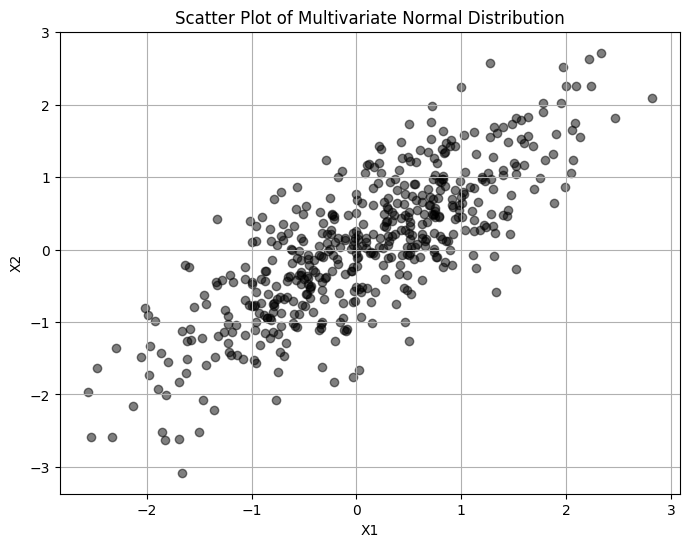

In [19]:
# Mean vector and covariance matrix
mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]]  # High correlation between variables

# Generate random samples
np.random.seed(0)
data = np.random.multivariate_normal(mean, cov, size=500)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, color="black")
# sns.scatterplot(x=data[:, 0], y=data[:, 1], alpha=0.5)
plt.title("Scatter Plot of Multivariate Normal Distribution")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()


Mean ($\mu$): 0.5

Covariance ($\sigma$): 0.1

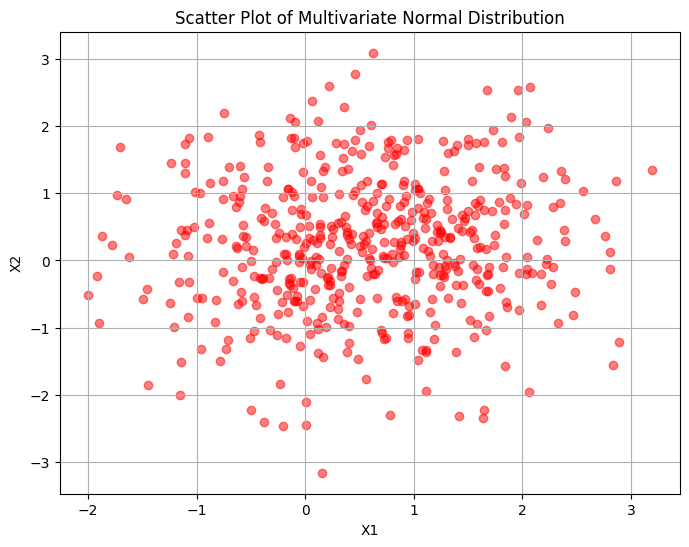

In [22]:
# Mean vector and covariance matrix
mean = [0.5, 0.2]
# low cov
cov = [[1, 0.1], [0.1, 1]]

# Generate random samples
np.random.seed(0)
data = np.random.multivariate_normal(mean, cov, size=500)


# Plot
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, color="red")
# sns.scatterplot(x=data[:, 0], y=data[:, 1], alpha=0.5)
plt.title("Scatter Plot of Multivariate Normal Distribution")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

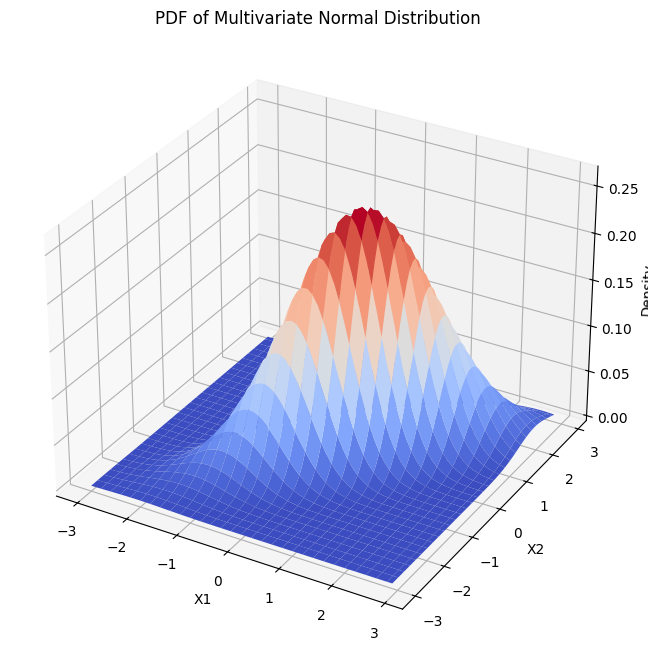

In [37]:
from scipy.stats import multivariate_normal

# Create a grid for visualization
x, y = np.mgrid[-3:3:0.1, -3:3:0.1]
pos = np.dstack((x, y))
cov = [[1, 0.8], [0.8, 1]]

# Multivariate normal distribution
rv = multivariate_normal(mean, cov, allow_singular=True)
pdf = rv.pdf(pos)

# Plot the PDF
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, pdf, cmap="coolwarm", edgecolor="none")  # type: ignore
ax.set_title("PDF of Multivariate Normal Distribution")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Density")  # type: ignore
plt.show()


In [38]:
# Partitioning the covariance matrix
cov_11 = np.array([[1]])
cov_12 = np.array([[0.8]])
cov_22 = np.array([[1]])
inv_cov_22 = np.linalg.inv(cov_22)

# Given X2 = 0.5
x2_given = np.array([0.5])
mean_1 = np.array([0])
mean_2 = np.array([0])

# Conditional mean and covariance
conditional_mean = mean_1 + cov_12 @ inv_cov_22 @ (x2_given - mean_2)
conditional_cov = cov_11 - cov_12 @ inv_cov_22 @ cov_12.T

print("Conditional Mean of X1 given X2=0.5:", conditional_mean)
print("Conditional Covariance of X1 given X2=0.5:", conditional_cov)


Conditional Mean of X1 given X2=0.5: [0.4]
Conditional Covariance of X1 given X2=0.5: [[0.36]]
